In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import fftpack
from scipy import signal

### Cortando os nomes dos arquivos para renomear depois

In [44]:
EVlist = []
EVlistS = []
EVname = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/redeBP-SP/'):
    for EVfile in files:
        if EVfile.endswith('.z'):
            EVlist.append(os.path.join(root, EVfile))

In [25]:
EVlistS = sort(EVlist)
EVname = [i.split('/home/diogo/dados_doutorado/redeBP-SP/')[1] for i in EVlistS]
EVnameN = [i.split('/')[0] for i in EVname]
STAnameEV1 = [i.split('/')[1] for i in EVname]
STAnameEV2 = [i.split('.n')[0] for i in STAnameEV1]
STAname = [i.split('_')[0] for i in STAnameEV2]

IndexError: list index out of range

### Copiando os arquivos renomeados

In [26]:
for i,j in enumerate(EVlistS):
    shutil.copyfile(j,'/home/diogo/dados_doutorado/redeBP-SP/' + EVnameN[i]+ '/' + STAname[i] + '.BHE.' +EVnameN[i] + '.sac')

### Recolhendo as localizaçoes dos eventos e das estacoes:

In [193]:
filestala = []
filestalo = []
fileevtla = []
fileevtlo = []

for i,j in enumerate(EVlistS):
    file = obspy.read(j)
    filestala +=[file[0].stats.sac.stla]
    filestalo +=[file[0].stats.sac.stlo]
    fileevtla +=[file[0].stats.sac.evla]
    fileevtlo +=[file[0].stats.sac.evlo]

### Calculando o backazimute, azimute e distancia dos eventos:

In [194]:
baz = []
az = []
gcarc = []
for i,j in enumerate(filestala):
    result = obspy.core.util.geodetics.gps2DistAzimuth(j,filestalo[i],fileevtla[i],fileevtlo[i])
    baz += [result[1]]
    az += [result[2]]
    gcarc += [obspy.core.util.geodetics.kilometer2degrees(result[0]/1000)]

### Alterando os valores do backazimute, azimute e distancia nos arquivos dos eventos:

In [195]:
c = SacIO()

for i,j in enumerate(EVlistS):
    c.SetHvalueInFile(j,'baz',baz[i])
    c.SetHvalueInFile(j,'az',az[i])
    c.SetHvalueInFile(j,'gcarc',garc[i])

### Plotando As Funçoes do Receptor da estacao BDCO

In [98]:
RFlist = []

for root, dirs, files in os.walk('/home/diogo/process/BP02/filtrados/gcarc_30_90/'):
    for RFfile in files:
        if RFfile.endswith('.decon.sac'):
            RFlist.append(os.path.join(root, RFfile))
RFlist = RFlist[0::9]

In [99]:
RF = []
for i,j in enumerate(RFlist):
    RF += obspy.read(j)
    RF[i].normalize()

In [100]:
RForglist = np.argsort([i.stats.sac.baz for i in RF])
RFbaz = [i.stats.sac.baz for i in RF]
RFp = [i.stats.sac.user8 for i in RF]

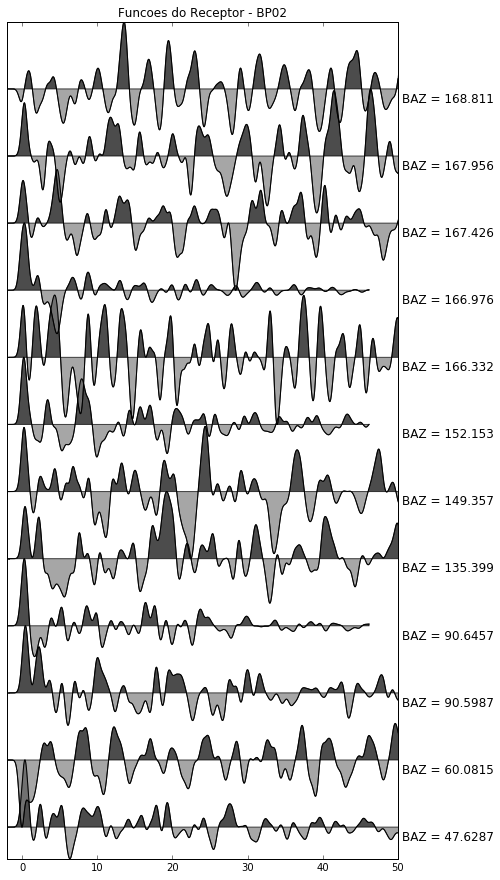

In [101]:
plt.figure(figsize = (7,15))
for k, j in enumerate(RForglist): 
    plt.plot(RF[j].times()-5,k+RF[j].data,'k',linewidth=1)
    plt.fill_between(RF[j].times()-5,k+RF[j].data,k,where=(k+RF[j].data)>=k, facecolor='black',alpha=0.7, interpolate=True)
    plt.fill_between(RF[j].times()-5,k+RF[j].data,k,where=(k+RF[j].data)<=k, facecolor='gray',alpha=0.7, interpolate=True)
    plt.text(50.5,k-0.2,'BAZ = %s' % (RFbaz[j]),fontsize=12)
    #plt.text(50.5,k-0.2,'p = %s' % (RFp[j]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - BP02')
    plt.xlim(-2,50)